## Loading Data

In [1]:
#load libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neural_network  import MLPRegressor
from sklearn.svm             import SVC
from xgboost                 import XGBRegressor
from sklearn.metrics         import mean_absolute_error,mean_squared_error, accuracy_score,plot_confusion_matrix,classification_report, matthews_corrcoef
from sklearn.metrics         import recall_score,precision_score,f1_score
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('top50.csv')

In [3]:
dataset.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0          50 non-null int64
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.5+ KB


In [5]:
dataset.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


#### From data description, we can see there are no missing data and all the values are not null.

In [6]:
# print out column names
dataset.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [7]:
# drop the first index column
df=dataset.drop(['Unnamed: 0'],axis=1)

In [8]:
len(df['Track.Name'].unique())

# there is no repeat track name

50

In [9]:
# drop 'Track.Name' feature.
df=df.drop(['Track.Name'],axis=1)

In [10]:
len(df['Artist.Name'].unique())

38

In [11]:
len(df['Genre'].unique())

21

In [12]:
#apply label encoder to features 'Artist.Name' and 'Genre'.
le=preprocessing.LabelEncoder()
df['Artist.Name']=le.fit_transform(df['Artist.Name'])
df['Genre']=le.fit_transform(df['Genre'])

In [13]:
df.head()

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,32,6,117,55,76,-6,8,75,191,4,3,79
1,1,19,105,81,79,-4,8,61,302,8,9,92
2,2,8,190,80,40,-4,16,70,186,12,46,85
3,9,15,93,65,64,-8,8,55,198,12,19,86
4,28,9,150,65,58,-4,11,18,175,45,7,94


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
Artist.Name         50 non-null int64
Genre               50 non-null int64
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(12)
memory usage: 4.8 KB


In [15]:
s = df.select_dtypes(include='int64').columns
df[s] = df[s].astype("float")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
Artist.Name         50 non-null float64
Genre               50 non-null float64
Beats.Per.Minute    50 non-null float64
Energy              50 non-null float64
Danceability        50 non-null float64
Loudness..dB..      50 non-null float64
Liveness            50 non-null float64
Valence.            50 non-null float64
Length.             50 non-null float64
Acousticness..      50 non-null float64
Speechiness.        50 non-null float64
Popularity          50 non-null float64
dtypes: float64(12)
memory usage: 4.8 KB


## Data Visualization

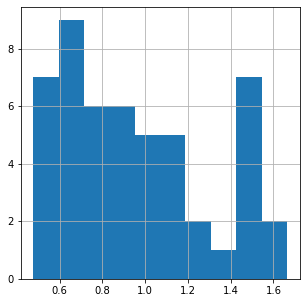

In [17]:
df['log_of_Speechiness'] = np.log10(df['Speechiness.'])
df['log_of_Speechiness'].hist(figsize=(5,5))
plt.show()

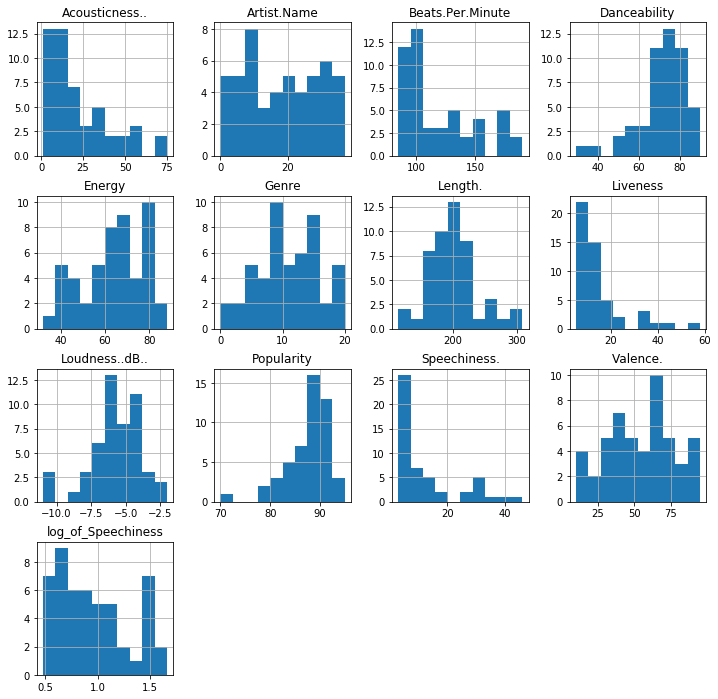

In [18]:
# plot histgram of features and target
df.hist(figsize=(12,12))
plt.show()

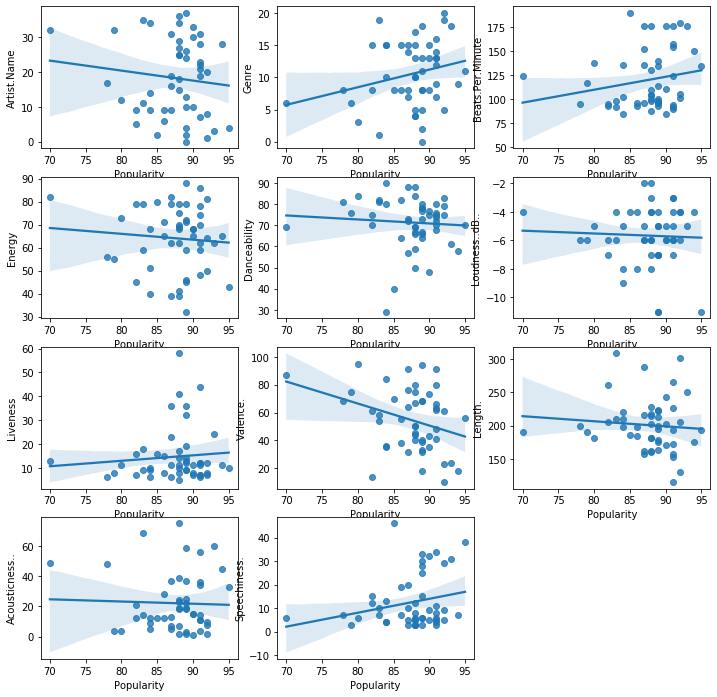

In [19]:
plt.figure(figsize=(12,12))
plt.subplot(4,3,1)
sns.regplot(x=df.Popularity,y=df['Artist.Name'],data=df)
plt.subplot(4,3,2)
sns.regplot(x=df.Popularity,y=df['Genre'],data=df)
plt.subplot(4,3,3)
sns.regplot(x=df.Popularity,y=df['Beats.Per.Minute'],data=df)
plt.subplot(4,3,4)
sns.regplot(x=df.Popularity,y=df['Energy'],data=df)
plt.subplot(4,3,5)
sns.regplot(x=df.Popularity,y=df['Danceability'],data=df)
plt.subplot(4,3,6)
sns.regplot(x=df.Popularity,y=df['Loudness..dB..'],data=df)
plt.subplot(4,3,7)
sns.regplot(x=df.Popularity,y=df['Liveness'],data=df)
plt.subplot(4,3,8)
sns.regplot(x=df.Popularity,y=df['Valence.'],data=df)
plt.subplot(4,3,9)
sns.regplot(x=df.Popularity,y=df['Length.'],data=df)
plt.subplot(4,3,10)
sns.regplot(x=df.Popularity,y=df['Acousticness..'],data=df)
plt.subplot(4,3,11)
sns.regplot(x=df.Popularity,y=df['Speechiness.'],data=df)

plt.show()

In [20]:
df.describe()

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,log_of_Speechiness
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,18.300000,10.520000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000,0.948463
std,11.161614,5.039598,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489,0.352678
min,0.000000,0.000000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000,0.477121
25%,9.000000,7.250000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000,0.698970
50%,18.500000,10.000000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000,0.845098
75%,28.000000,15.000000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000,1.176091
max,37.000000,20.000000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000,1.662758


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

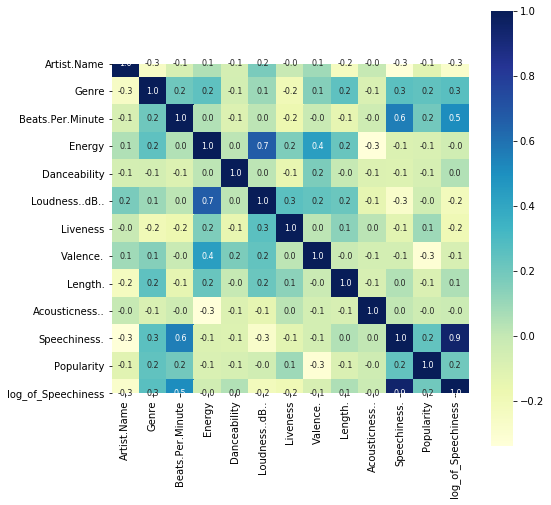

In [21]:
# construct a correlation heatmap 
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='YlGnBu')
plt.plot

#### From the correlation heatmap we can see high correlation between features 'Loudness..dB' and 'Energy', 'Beats.Per.Minute' and 'Speechiness'.
#### I will drop features 'Loudness..dB..' and 'Speechiness.'.

In [22]:
# split the dataset into data and target
#data=df.drop(['Popularity','Acousticness..','Beats.Per.Minute','Liveness','Speechiness.'],axis=1)
data=df[['Danceability', 'Valence.', 'Length.', 'Energy', 'Artist.Name', 'Genre']]
y=df['Popularity']

In [23]:
data.head(10)

,Danceability,Valence.,Length.,Energy,Artist.Name,Genre
0,76.0,75.0,191.0,55.0,32.0,6.0
1,79.0,61.0,302.0,81.0,1.0,19.0
2,40.0,70.0,186.0,80.0,2.0,8.0
3,64.0,55.0,198.0,65.0,9.0,15.0
4,58.0,18.0,175.0,65.0,28.0,9.0
5,80.0,84.0,220.0,68.0,9.0,15.0
6,75.0,23.0,131.0,64.0,20.0,20.0
7,48.0,35.0,202.0,68.0,30.0,15.0
8,88.0,64.0,157.0,62.0,19.0,7.0
9,70.0,56.0,194.0,43.0,4.0,11.0


In [24]:
# scale the features to zero mean and unit variance.
X_scaled=preprocessing.StandardScaler().fit_transform(data)

In [25]:
#print(X_scaled[:5,:])

## Build model

In [26]:
# split the dataset
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.1)

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb=XGBRegressor(random_state=11, seed=2)
parameters={'gamma':[0],
            'learning_rate':[0.001,0.01,0.1],
            'max_depth':[5,6,7],
            'n_estimators':[100,1000,1500],
            'n_jobs':[16],
            'objective':['reg:squarederror'],
            'subsample':[0.8],
            'scale_pos_weight':[0],
            'reg_alpha':[0],
            'reg_lambda':[1],
            'booster':['gbtree']}

xgb_grid=GridSearchCV(xgb,
                      parameters,
                      cv=5,
                      verbose=True)

#fit the model

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a 

/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/vend/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/vend/anaconda3

In [28]:
model =  xgb_grid.best_estimator_
# predict X_train
y_predict_train = model.predict(X_train)
# predict X_test
y_predict_test = model.predict(X_test)

In [29]:
from sklearn import metrics
# R squared
TestRsquared = metrics.r2_score(y_test,y_predict_test)
print('R-Squared:', TestRsquared)

# Mean Absolute Error
TestMAE = metrics.mean_absolute_error(y_test,y_predict_test)
print('MAE:', TestMAE)

# Mean Squared Error
TestMSE = metrics.mean_squared_error(y_test,y_predict_test)
print('MSE:', TestMSE)

# Root Mean Squared Error

TestRMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict_test))
print('RMSE:', TestRMSE)

# Median
TestMe = metrics.median_absolute_error(y_test,y_predict_test)
print('Median:', TestMe)

R-Squared: 0.7163550210500191
MAE: 2.007337951660156
MSE: 7.102470272907522
RMSE: 2.6650460170337626
Median: 1.0225906372070312


In [30]:
kk=len(y_test)

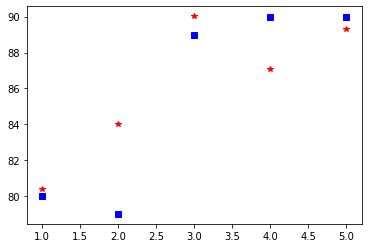

In [31]:
plt.plot(np.arange(1,kk+1,1),y_predict_test,'r*')
#plt.plot(y_predict_test,'b')
plt.plot(np.arange(1,kk+1,1),y_test,'bs')
plt.show()

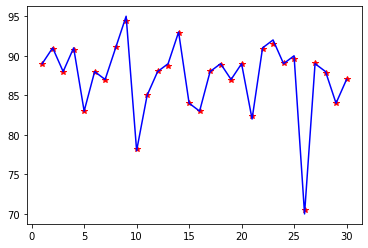

In [32]:
plt.plot(np.arange(1,31,1),y_predict_train[:30],'r*')
#plt.plot(y_predict_test,'b')
plt.plot(np.arange(1,31,1),y_train[:30],'b')
plt.show()

In [33]:
TrainRsquared = metrics.r2_score(y_train[:5],y_predict_train[:5])
print('R-Squared:', TrainRsquared)

# Mean Absolute Error
TrainMAE = metrics.mean_absolute_error(y_train,y_predict_train)
print('MAE:', TrainMAE)

# Mean Squared Error
TrainMSE = metrics.mean_squared_error(y_train,y_predict_train)
print('MSE:', TrainMSE)

# Root Mean Squared Error
TrainRMSE = np.sqrt(metrics.mean_squared_error(y_train,y_predict_train))
print('RMSE:', TrainRMSE)

# Median
TrainMe = metrics.median_absolute_error(y_train,y_predict_train)
print('Median:', TrainMe)

R-Squared: 0.9979060100573676
MAE: 0.14260965983072918
MSE: 0.04201251985246523
RMSE: 0.20496955835554026
Median: 0.07883453369140625
